In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats-redux-kernels-edition/train.zip
/kaggle/input/dogs-vs-cats-redux-kernels-edition/sample_submission.csv
/kaggle/input/dogs-vs-cats-redux-kernels-edition/test.zip


# loading libraries

In [2]:
import os
import glob
from os import listdir
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

In [3]:
from numpy.random import seed
seed(1)
tf.random.set_seed(1)

In [4]:
#!pip3 install -U scikit-learn
import sklearn
from sklearn import model_selection

# load data

In [5]:
import zipfile
# Will unzip the files so that you can see them..
with zipfile.ZipFile("../input/dogs-vs-cats-redux-kernels-edition/train.zip","r") as z:
    z.extractall(".")
with zipfile.ZipFile("../input/dogs-vs-cats-redux-kernels-edition/test.zip","r") as z:
    z.extractall(".")

In [6]:
# images= np.random.permutation(listdir('train/'))

In [7]:
# images[0],images[1],images[2],images[3]

In [8]:
# images = []
# labels=[]
# for file in listdir('train/'):
#     label=1.0
#     if file.startswith('cat'):
#         label=0.0
#     image = keras.preprocessing.image.load_img('train/'+file,target_size=(150,150))
#     image_array= keras.preprocessing.image.img_to_array(image)
#     images.append(image_array)
#     labels.append(label)
# images= np.asarray(images)
# labels=np.asarray(labels)


In [9]:
# labels.shape

In [10]:
# x_train,x_valid,y_train,y_valid = model_selection.train_test_split(images,labels,test_size=0.20,random_state=42,shuffle=True)

In [11]:
# from numpy import savez_compressed
# from  numpy import load

In [12]:
# savez_compressed('kaggle/working/x_train.npz', x_train=x_train)
# savez_compressed('kaggle/working/y_train.npz', y_train=y_train)
# savez_compressed('kaggle/working/x_valid.npz', x_valid=x_valid)
# savez_compressed('kaggle/working/y_valid.npz', y_valid=y_valid)

In [13]:
"""train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
train_generator=train_datagen.flow(x_train,y_train,batch_size=32,shuffle=True)
valid_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
valid_generator=train_datagen.flow(x_valid,y_valid,batch_size=32,shuffle=True)"""

'train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)\ntrain_generator=train_datagen.flow(x_train,y_train,batch_size=32,shuffle=True)\nvalid_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)\nvalid_generator=train_datagen.flow(x_valid,y_valid,batch_size=32,shuffle=True)'

In [14]:
# uncomment if want to use flow from directory
!mkdir train/train_data
!mkdir train/valid_data
!mkdir train/train_data/cats
!mkdir train/train_data/dogs
!mkdir train/valid_data/cats
!mkdir train/valid_data/dogs
cats_images = [os.path.basename(x) for x in glob.glob('train/cat.*.jpg')]
cats_imags= np.random.permutation(cats_images)
dogs_images = [os.path.basename(x) for x in glob.glob('train/dog.*.jpg')]
dogs_imags= np.random.permutation(dogs_images)


In [15]:
# moving images in dogs and cats folder inside train and valid folder
for i in range(int(0.20*len(cats_images))):
    os.rename('train/'+cats_images[i],'train/valid_data/cats/'+cats_images[i])
for i in range(int(0.20*len(cats_images)),len(cats_images)):
    os.rename('train/'+cats_images[i],'train/train_data/cats/'+cats_images[i])
for i in range(int(0.20*len(dogs_images))):
    os.rename('train/'+dogs_images[i],'train/valid_data/dogs/'+dogs_images[i])
for i in range(int(0.20*len(dogs_images)),len(dogs_images)):
    os.rename('train/'+dogs_images[i],'train/train_data/dogs/'+dogs_images[i])

In [16]:
# !mv  -v train/cat.*.jpg train/train_data/cats
# !mv  -v train/dog.*.jpg train/train_data/dogs

In [17]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
train_generator=train_datagen.flow_from_directory('train/train_data',target_size=(200,200),batch_size=32,class_mode='categorical',shuffle=True)
valid_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
valid_generator=train_datagen.flow_from_directory('train/valid_data',target_size=(200,200),batch_size=32,class_mode='categorical',shuffle=True)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# conv_model

In [18]:
def model():
    input1= keras.layers.Input(shape=(200,200,3,))
    #x = keras.layers.BatchNormalization()(input1)
    x= keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='same',activation='relu')(input1)
    x= keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='same',activation='relu')(x)
    x = keras.layers.MaxPool2D(pool_size=2)(x)
    x = keras.layers.BatchNormalization()(x)
    x= keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same',activation='relu')(x)
    x= keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='same',activation='relu')(x)
    x = keras.layers.MaxPool2D(pool_size=2)(x)
    x = keras.layers.BatchNormalization()(x)
    x= keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=1,padding='same',activation='relu')(x)
    x= keras.layers.Conv2D(filters=128,kernel_size=(3,3),strides=1,padding='same',activation='relu')(x)
    x = keras.layers.MaxPool2D(pool_size=2)(x)
    x = keras.layers.BatchNormalization()(x)
    x= keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=1,padding='same',activation='relu')(x)
    x= keras.layers.Conv2D(filters=256,kernel_size=(3,3),strides=1,padding='same',activation='relu')(x)
    x = keras.layers.MaxPool2D(pool_size=2)(x)
    x = keras.layers.BatchNormalization()(x)
    x= keras.layers.Flatten()(x)
    x = keras.layers.Dropout(0.5)(x)
    x= keras.layers.Dense(512,activation='relu')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.5)(x)
    x= keras.layers.Dense(128,activation='relu')(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.2)(x)
    output1= keras.layers.Dense(2,activation='softmax')(x)
    conv_model= keras.models.Model(inputs=input1,outputs=output1)
    return conv_model

In [19]:
conv_model= model()

In [20]:
# This function keeps the initial learning rate for the first ten epochs  
# and decreases it exponentially after that.  
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * np.math.exp(-0.1)

In [21]:
.1 * np.math.exp(-0.1)

0.09048374180359596

In [22]:
!pwd

/kaggle/working


In [23]:
checkpoint_filepath = '/kaggle/working/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='/kaggle/working/logs',
                                                      profile_batch=5)

In [25]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [26]:
loss= keras.losses.CategoricalCrossentropy()
optimizer=keras.optimizers.Adam(learning_rate=.010)
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
callback =[model_checkpoint_callback,learning_rate_callback,tensorboard_callback,early_stopping_callback]
conv_model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history =conv_model.fit(train_generator,epochs=100,
               validation_data=valid_generator,callbacks=callback)#,steps_per_epoch=2,validation_steps=2)

Epoch 1/100
625/625 [==============================] - 287s 459ms/step - loss: 0.7122 - accuracy: 0.5588 - val_loss: 0.7366 - val_accuracy: 0.5024 - lr: 0.0100
Epoch 2/100
625/625 [==============================] - 289s 462ms/step - loss: 0.6436 - accuracy: 0.6299 - val_loss: 0.7236 - val_accuracy: 0.5654 - lr: 0.0100
Epoch 3/100
625/625 [==============================] - 293s 469ms/step - loss: 0.6119 - accuracy: 0.6654 - val_loss: 0.8367 - val_accuracy: 0.5768 - lr: 0.0100
Epoch 4/100
625/625 [==============================] - 292s 468ms/step - loss: 0.5693 - accuracy: 0.7059 - val_loss: 0.6623 - val_accuracy: 0.6114 - lr: 0.0100
Epoch 5/100
625/625 [==============================] - 303s 484ms/step - loss: 0.5350 - accuracy: 0.7363 - val_loss: 0.5820 - val_accuracy: 0.7072 - lr: 0.0100
Epoch 6/100
625/625 [==============================] - 298s 477ms/step - loss: 0.5063 - accuracy: 0.7516 - val_loss: 0.5689 - val_accuracy: 0.7082 - lr: 0.0090
Epoch 7/100
625/625 [===================

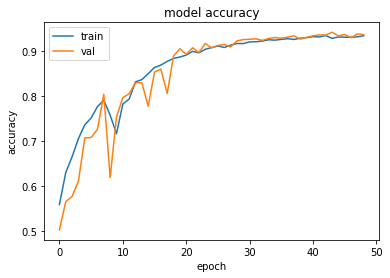

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

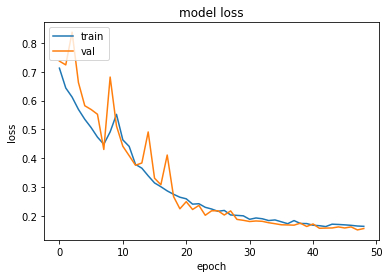

In [28]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
#%load_ext tensorboard

In [30]:
#!tensorboard --logdir=/kaggle/working/logs